# Bike-Sharing Case Study Assignement
___
## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Assumptions
1. Data file does not contain any sensitive data
2. Dataset follows principle of linear regression
3. Data can not be deleted in isolation without undertanding the business implications
## Checklist
Following steps will be followed:
- [ ] Reading, understanding and visualising the data
- [ ] Preparing the data for modeling (train-test, split, rescaling etc.)
- [ ] Training the model
- [ ] Residual Analysis
- [ ] Prediction and evaluation on the test set

## Data-set variables
- `pdBike`: Orignal dataset having orignal csv data without any data massaging.
- `pdBike_pp`: Bike data set after removing unused columns and decoding columns `yr`, `weathersit` and `season`

## References
TODO! Add github repo location here

## Data Dictionary
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Pre-requisites, Imports and etc

In [1]:
# Step#1: Mount my google drive.
# This is an optional step and can be skipped
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For train + test
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Evaluate
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pdBike = pd.read_csv('day.csv')

# Step#1: Reading, Understading, Filetering and visualizing the dataset

In [4]:
pdBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
pdBike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
pdBike.shape

(730, 16)

In [7]:
pdBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
pdBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Key Findings**
- Orignal data set have 730 rows and 16 columns
- Either `int64` or `float64` data types are defined for all columns except of one column `dteday`
- Column `season` is categorical in nature having values (1:spring, 2:summer, 3:fall, 4:winter)
- Column `yr` is also categorical with values as 0: 2018, 1:2019
- Columns `holiday`and `workingday` are boolean and represented as 1 and 0 (1 means true and 0 means false)



## Removing unused / unnecessary columns
We will remove following columns as they are unnecessary and can be ignored for our data set:
- `instant`: this column represents index of the row and can be ignored as it does not have any implication on the result.
- `dteday`: this column repsent record day and, for our analysis domain, does not have any significance
- `casual` and `registered`: count of casual or registered riders. We will ignore it as for our analysis, we will use `cnt` as an accumilated count column

In [9]:
pdBike_pp = pdBike.drop(['instant','dteday','casual','registered'], axis=1)
temp_pdBike = pdBike_pp

In [10]:
print(f'Shape before removing columns: {pdBike.shape}')
print(f'Shape after removing columns: {pdBike_pp.shape}')

Shape before removing columns: (730, 16)
Shape after removing columns: (730, 12)


## Decoding columns 
In this step, we will decode columns `weathersit` `season` and `yr`

- `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)

In [11]:
pdBike_pp['yr'] = pdBike['yr'].apply(lambda x: '2018' if x == 0 else '2019')
pdBike_pp['yr'] = pdBike_pp['yr'].astype(str)

In [12]:
pdBike_pp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Will create dummy variables for the same
pdBike_pp['season'] = pdBike['season'].apply(lambda x: 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter')
pdBike_pp['season'] = pdBike_pp['season'].astype(str)
pdBike_pp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Will create dummy variables for the same
pdBike_pp['weathersit'] = pdBike['weathersit'].apply(lambda x: 'clear' if x == 1 else 'mist' if x == 2 else 'light-snow' if x == 3 else 'heavy-rain')
pdBike_pp['weathersit'] = pdBike_pp['weathersit'].astype(str)
pdBike_pp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
pdBike_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [16]:
print(pdBike['season'].value_counts())
print(pdBike['yr'].value_counts())
print(pdBike['weathersit'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [17]:
print(pdBike_pp['season'].value_counts())
print(pdBike_pp['yr'].value_counts())
print(pdBike_pp['weathersit'].value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
2018    365
2019    365
Name: yr, dtype: int64
clear         463
mist          246
light-snow     21
Name: weathersit, dtype: int64


In [18]:
pdBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Determining Data Quality
In this step, we will determine data quality by anallysing the columns

In [19]:
pdBike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
pdBike_pp.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Observation(s)**
- No null value found in the dataset
- Apparently, data is clean and no data quality issue found

## Visualising Numerical Variables

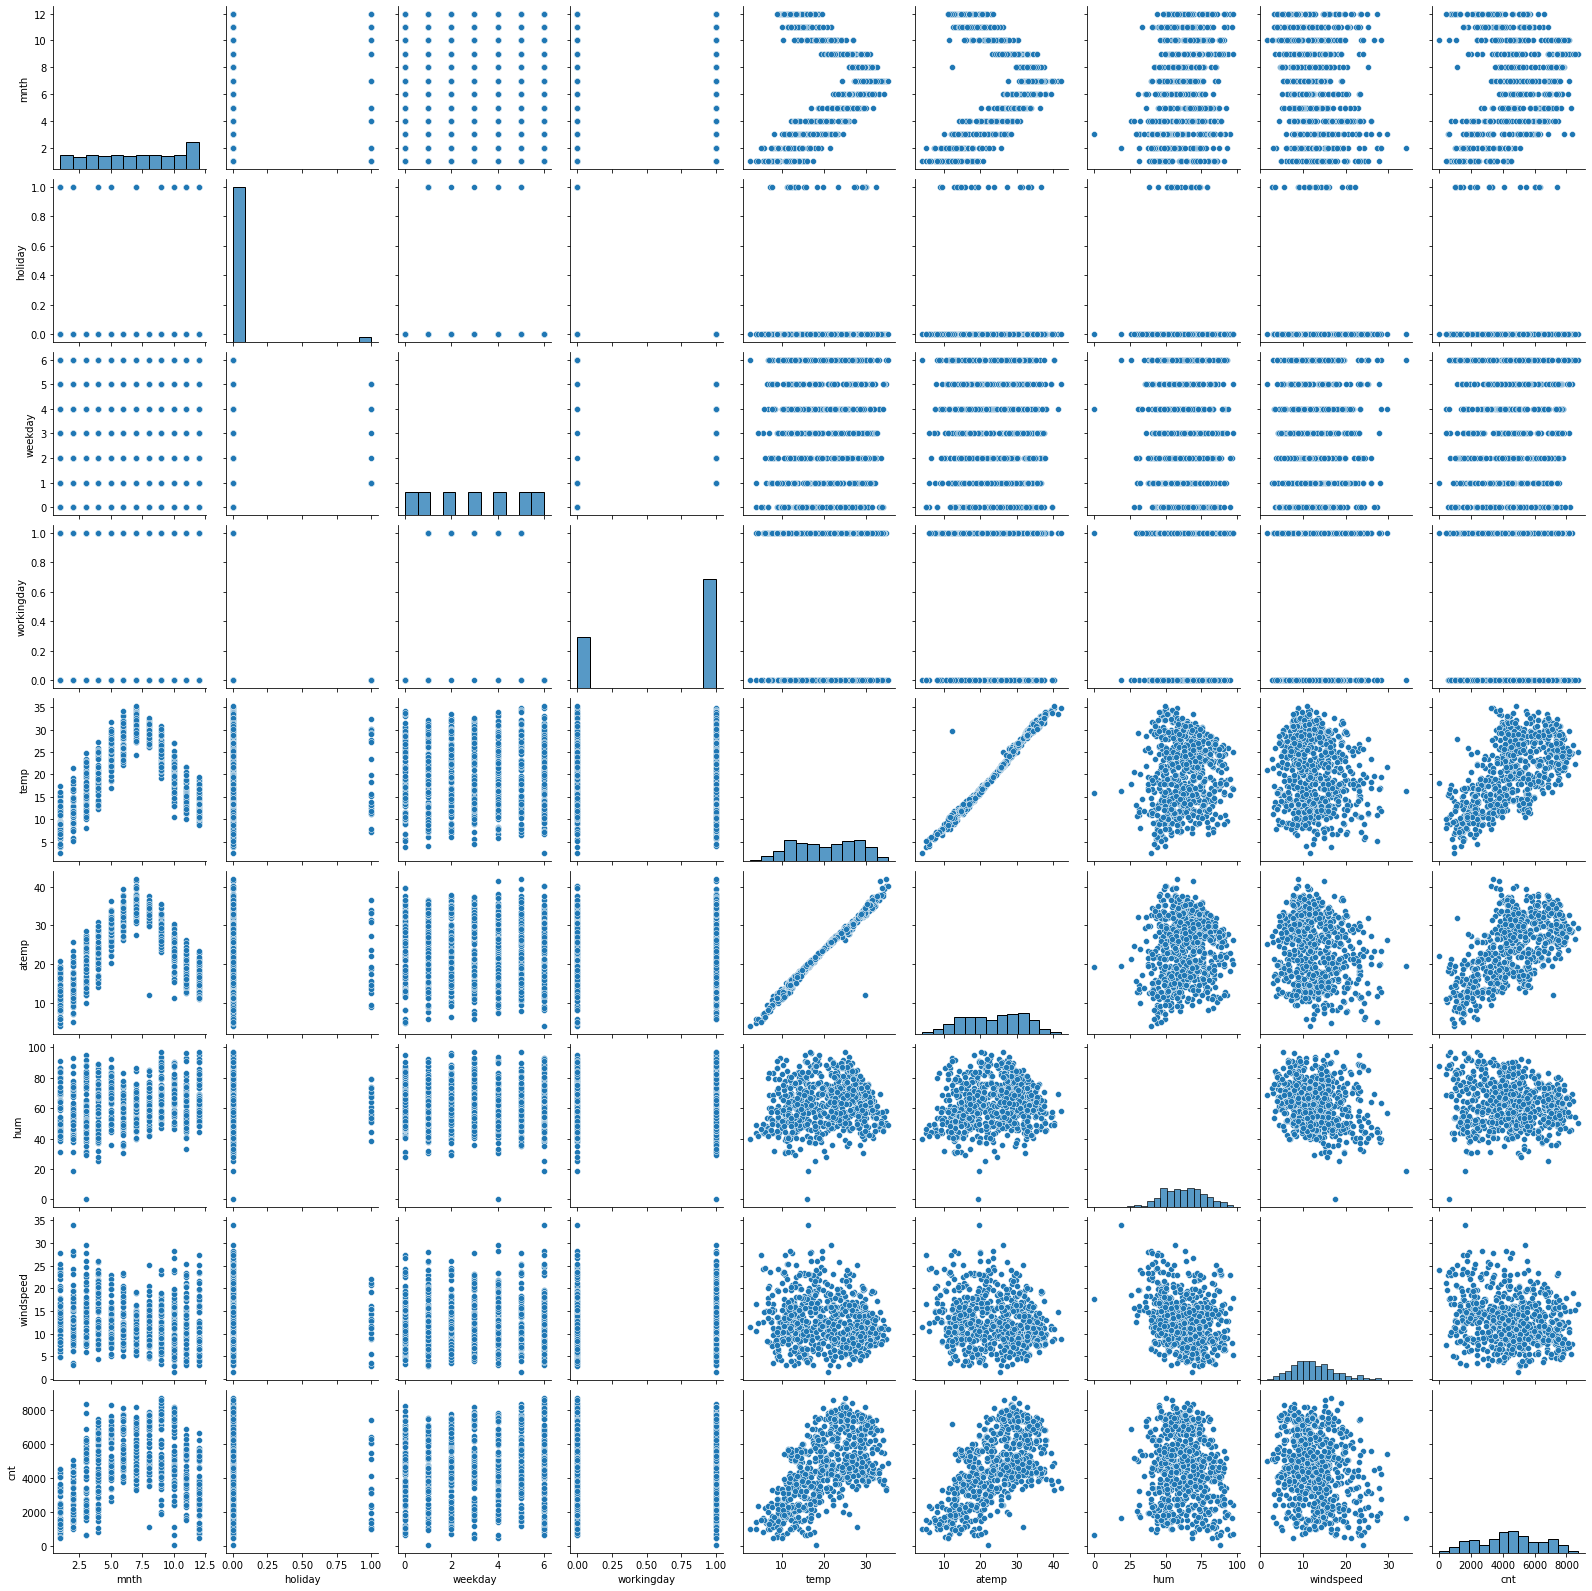

In [21]:
sns.pairplot(pdBike_pp)
plt.show()

**Observations**
- Linear relationship exists b/w temp and atemp. This should be obvious as atemp is the `Reel Feel` temprature and directly propotional with temp.
- Linear relationship exists b/w `cnt` and `temp` (and atemp) as well. 

## Visualising Categorical Varaibles

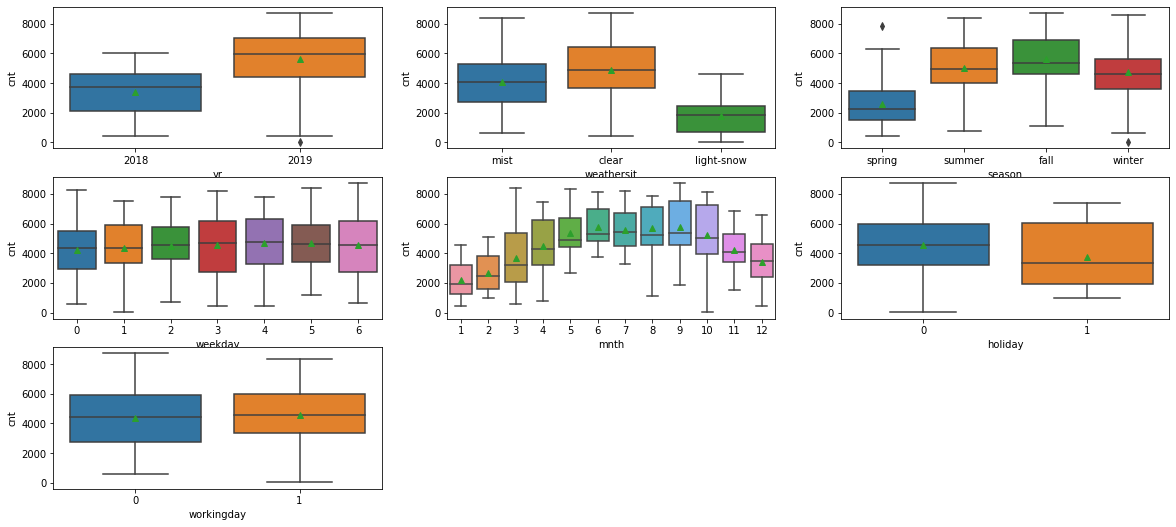

In [25]:
plt.figure(figsize=(20,12))

plt.subplot(4,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = pdBike_pp,showmeans=True)

plt.subplot(4,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = pdBike_pp,showmeans=True)

plt.subplot(4,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = pdBike_pp, showmeans=True)

plt.subplot(4,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = pdBike_pp, showmeans=True)

plt.subplot(4,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = pdBike_pp, showmeans=True)

plt.subplot(4,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = pdBike_pp, showmeans=True)

plt.subplot(4,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = pdBike_pp, showmeans=True)

plt.show()

**Observations**
- In total, 6000 rides were made on year 2019 which is greater then approximately 3800 rides in 2018
- More rides are taken when weather is clear
- More rides are taken in summer and fall

# Step#2: Creating Dummy Variables
In this step, we will encode categorical variables and associate dummy variables to them

In [90]:
# `yr` (Year)
#
dmvar_Year = pd.get_dummies(pdBike_pp['yr'])
print(pdBike_pp['yr'].value_counts())
print(dmvar_Year.value_counts())


2018    365
2019    365
Name: yr, dtype: int64
2018  2019
0     1       365
1     0       365
dtype: int64


In [91]:
# `weathersit` (Weather Situation)
# NOTE: Choosing not to drop the first column so that we can have 
# better visibility of the variables
dmvar_Weather = pd.get_dummies(pdBike_pp['weathersit'])
dmvar_Weather.tail()
print(pdBike_pp['weathersit'].value_counts())
print(dmvar_Weather.value_counts())

clear         463
mist          246
light-snow     21
Name: weathersit, dtype: int64
clear  light-snow  mist
1      0           0       463
0      0           1       246
       1           0        21
dtype: int64


In [92]:
# `season` (seasons)
# NOTE: Choosing not to drop the first column so that we can have 
# better visibility of the variables
dmvar_Season = pd.get_dummies(pdBike_pp['season'])
print(pdBike_pp['season'].value_counts())
print(dmvar_Season.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64


In [93]:
# `mnth` (month of the year)
dmvar_Mnth = pd.get_dummies(data=pdBike_pp['mnth'],prefix='mnth', drop_first=True)
print(pdBike_pp['mnth'].value_counts())
print(dmvar_Mnth.value_counts())

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12
0       0       0       0       0       0       0       0       0        0        0          62
                                                                                  1          62
                                                                1        0        0          62
                                                1       0       0        0        0          62
                                        1       0       0       0        0        0          62
                        1       0       0       0       0       0        0        0          62
        1       0       0       0       0       0       0       0        0        0          62
        0       0       0       0       0       0       0       0        1        0          60
         

In [94]:
# `weekday` (month of the year)
dmvar_WeekDay = pd.get_dummies(data=pdBike_pp['weekday'],prefix='weekday', drop_first=True)
print(pdBike_pp['weekday'].value_counts())
print(dmvar_WeekDay.value_counts())

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6
0          0          0          0          0          0            105
                                                       1            105
1          0          0          0          0          0            105
0          0          0          0          1          0            104
                                 1          0          0            104
           1          0          0          0          0            104
           0          1          0          0          0            103
dtype: int64


In [95]:
pdBike_pp = pd.concat([pdBike_pp, dmvar_Year, dmvar_Weather, dmvar_Season, dmvar_Mnth, dmvar_WeekDay ], axis=1)

In [96]:
pdBike_pp = pdBike_pp.drop(['weathersit', 'season', 'yr','mnth', 'weekday'], axis=1)

In [97]:
pdBike_pp.head()
pdBike_pp.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       '2018', '2019', 'clear', 'light-snow', 'mist', 'fall', 'spring',
       'summer', 'winter', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [98]:
pdBike_pp.shape

(730, 33)

In [99]:
pdBike_pp.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       '2018', '2019', 'clear', 'light-snow', 'mist', 'fall', 'spring',
       'summer', 'winter', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

## Splitting into train and test
In this step, we will split the data set to train and test.

In [100]:
df_train, df_test = train_test_split(pdBike_pp, train_size=0.7, random_state=100)
print(f'df_train shape: {df_train.shape} :: df_test: {df_test.shape}')

df_train shape: (510, 33) :: df_test: (220, 33)


## Rescaling

In [101]:
# Min-Max Scaller
scaler = MinMaxScaler()
# create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'cnt', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2018,2019,clear,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,1,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,1,...,0,0,0,1,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step#3: Training the Model

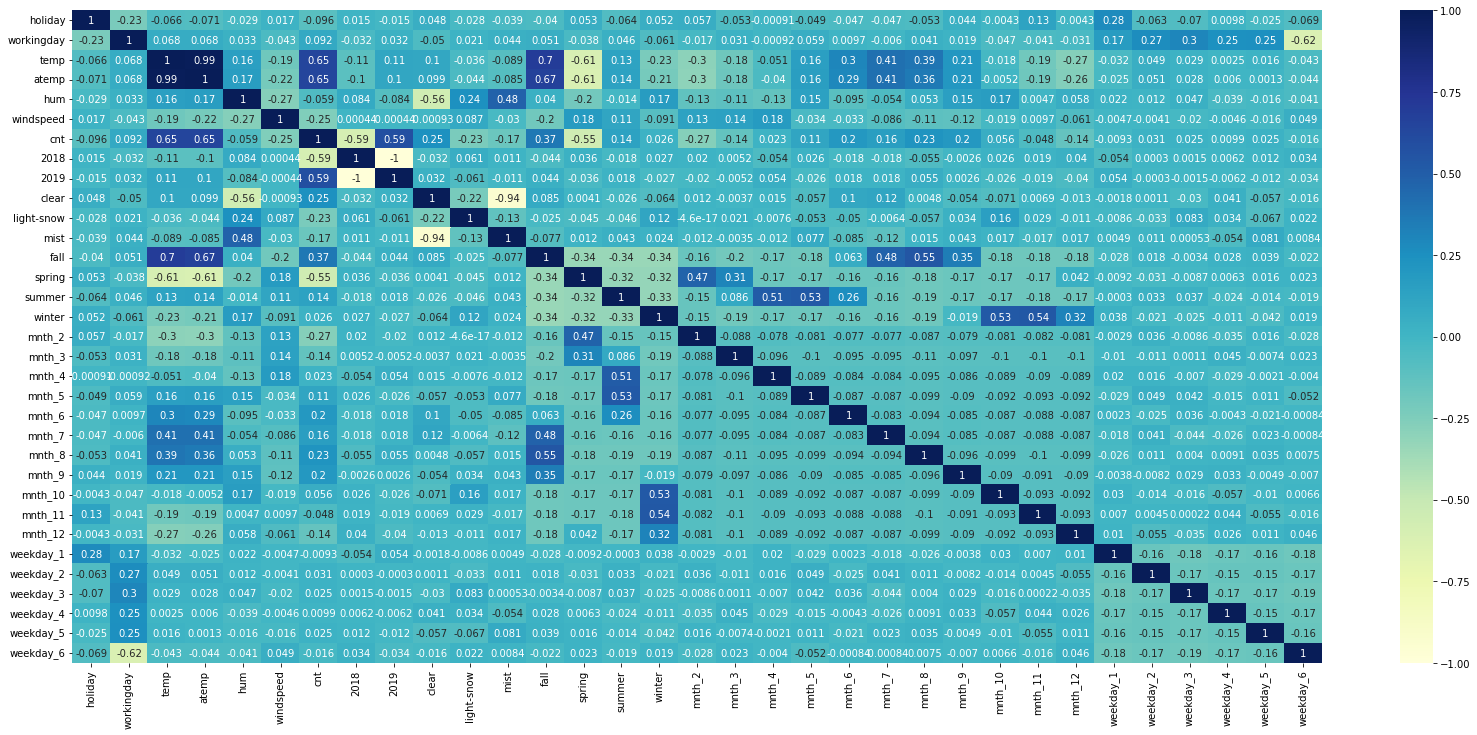

In [102]:
# Draw a heatmap
plt.figure(figsize=(28,12))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

**Observations**
- From the figure, we can see direct relationship b/w `cnt` and `temp`, `atemp`, `2019`, `clear` (weather), `fall` (season), `summer` (season) and months from june to october

In [103]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2018,2019,clear,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,1,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,1,...,0,0,0,1,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
# Slited variables df_train, df_test
y_train = df_train.pop('cnt')
x_train = df_train

# Step#4: Recursive Feature Elimination and Model Building

## Recursive Feature Elimination

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [106]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=15, step=1)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [107]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2018', True, 1),
 ('2019', True, 1),
 ('clear', True, 1),
 ('light-snow', True, 1),
 ('mist', False, 4),
 ('fall', False, 7),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 10),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 16),
 ('weekday_6', False, 5)]

In [108]:
col = x_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', '2018', '2019', 'clear',
       'light-snow', 'spring', 'winter', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_9'],
      dtype='object')

In [109]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mist', 'fall', 'summer', 'mnth_2', 'mnth_7',
       'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

## Building Model

In [110]:
x_train_rfe = x_train[col]

In [111]:
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [112]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [113]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          9.35e-187
Time:                        11:04:58   Log-Likelihood:                 506.54
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.025      9.773      0.0

>>NOTE: variable `2018` is insignificant for the model and should be removed

In [114]:
x_train_new = x_train_rfe.drop(["2018"], axis=1)

In [115]:
# Adding a constant variable 
x_train_lm = sm.add_constant(x_train_new)

In [116]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [117]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          9.35e-187
Time:                        11:04:58   Log-Likelihood:                 506.54
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2470      0.037      6.616      0.0

In [118]:
# Following columns are filtered out after this stage:
x_train_new.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', '2019', 'clear',
       'light-snow', 'spring', 'winter', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_9'],
      dtype='object')

In [119]:
# Removing `const` variable
x_train_new = x_train_new.drop(['const'], axis=1)

## Calculating `VIF`

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,20.13
1,temp,17.36
3,windspeed,4.68
7,spring,3.83
5,clear,3.33
8,winter,3.08
4,2019,2.08
10,mnth_4,1.56
11,mnth_5,1.47
12,mnth_6,1.36


In [121]:
# Removing `humidity`
x_train_new = x_train_new.drop(['hum'], axis=1)

In [122]:
vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.31
2,windspeed,4.68
4,clear,2.86
3,2019,2.08
6,spring,2.04
7,winter,1.62
9,mnth_4,1.38
11,mnth_6,1.36
10,mnth_5,1.30
8,mnth_3,1.29


In [123]:
# Recalculating the co-efficients
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.8
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          2.36e-184
Time:                        11:04:58   Log-Likelihood:                 498.07
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     496   BIC:                            -908.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.027      5.187      0.0

## Equation of the best-fitted surface based on the model
`cnt = 0.835 + (-0.0903*hliday) + (0.4432*temp) + (-0.1511*windspeed) + (0.2348 * 2019) + (0.0776 * clear) + (-0.2082 * ligth-snow) + (-0.0847 * spring) + (0.0840 * winter) + (mth_3 * 0.0539) + (0.0522*mnth_4) + (0.0637*mnth_5) + (0.0413*mnth_6) + (0.0912 * mnth_9)`

# Step#5: Residual Analysis
At this stage we will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

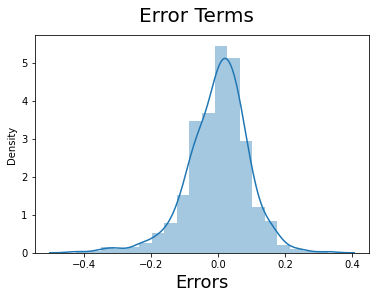

In [124]:
y_train_cnt = lm.predict(x_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step#6: Predictions and evaluation on the test set

In [125]:
# Min-Max Scaller
scaler = MinMaxScaler()
# create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'cnt', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2018,2019,clear,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,1,0,0,...,0,0,0,0,1,0,0,0,0,0
535,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,1,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,1,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [126]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2018,2019,clear,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.518182,0.481818,0.654545,...,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.500809,0.500809,0.476601,...,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
# Dividing data-set to x-test and y-test
y_test = df_test.pop('cnt')
x_test = df_test

In [128]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)
x_test_new.head()

,const,holiday,temp,windspeed,2019,clear,light-snow,spring,winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_9
184,1.0,1,0.837241,0.149393,0,0,0,0,0,0,0,0,0,0
535,1.0,0,0.911423,0.231142,1,1,0,0,0,0,0,0,1,0
299,1.0,0,0.496221,0.443398,0,0,0,0,1,0,0,0,0,0
221,1.0,0,0.890387,0.449707,0,1,0,0,0,0,0,0,0,0
152,1.0,0,0.821739,0.682387,0,1,0,0,0,0,0,0,1,0


In [129]:
# Making predictions
y_pred = lm.predict(x_test_new)

In [130]:
print(y_pred)

184    0.397193
535    0.861746
299    0.375922
221    0.543287
152    0.518974
         ...   
702    0.700874
127    0.514643
640    0.771301
72     0.276751
653    0.693367
Length: 220, dtype: float64


## Model Evaluation

Text(0, 0.5, 'y_pred')

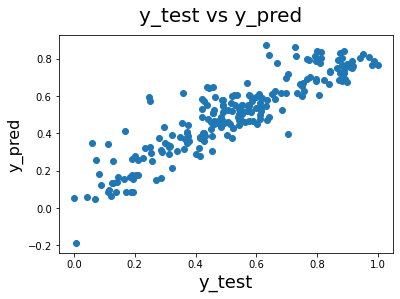

In [131]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [132]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7993348694730487

# Assignment-based Subjective Questions

## From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
- Demand of cycles increased in 2019 as compare to 2018
- People take more cycles when weather is clear
- Demand of cycles are high during summer and fall
- No major difference of bikes demand during weekdays
- Demand of cycles is high during June, July and August
- Demand of cycles is high during weekdays. It is less during holidays. We can infer that people are taking cycles for traveling to offices.
- Demand of cycles is slightly high during working days as compare to non working day

## Why is it important to use drop_first=True during dummy variable creation?
This drops the first value so that the variable can be encoded. For example, for a variable having values yes, no and maybe, if we set the dummy variable generation's attribute `drop_first=True`, only two columns will be generated with value 0 and 1. To interpret maybe (assuming it is the first column), 0,0 will be used for both columns.

## Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
- From the pair-plot, highest `temp` variable seems to have the highest regression
- Linear relationship exists b/w temp and atemp. This should be obvious as atemp is the Reel Feel temprature and directly propotional with temp.
- Linear relationship exists b/w cnt and temp (and atemp) as well.

## How did you validate the assumptions of Linear Regression after building the model on the training set?
- **Linear Relationship**: Pair-wise scatterplots may be helpful in validating the linearity assumption as it is easy to visualize a linear relationship on a plot.
- **Homoscedasticity**: To verify homoscedasticity, one may look at the residual plot and verify that the variance of the error terms is constant across the values of the dependent variable.
- **Absence of Multicollinearity**: Pairwise correlations could be the first step to identify potential relationships between various independent variables.
- **Independence of residuals (absence of auto-correlation)**: To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables (0–2: positive auto-correlation, 2–4: negative auto-correlation).
- **Normality of Errors**: To verify the normality of error, an easy way is to draw the distribution of residuals against levels of the dependent variable. One can use a QQ-plot and measure the divergence of the residuals from a normal distribution. If the resulting curve is not normal (i.e. is skewed), it may highlight a problem

Ref: https://towardsdatascience.com/verifying-and-tackling-the-assumptions-of-linear-regression-32126acea67b

## Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
Top 3 features contributing significantly are:
- Month
- Season 
- Temprature

# General Subjective Questions

## Explain the linear regression algorithm in detail
Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable. The linear regression model provides a sloped straight line representing the relationship between the variables.

## Explain the Anscombe’s quartet in detail
Anscombe’s quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

Ref: https://www.geeksforgeeks.org/anscombes-quartet/



## What is Pearson’s R?
In statistics, the Pearson correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

Ref: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling?
It is used to normalize data within particular range and is ued becasue data set contains fearures in different scale. Example; a data set can contain features like height and weight, where height of 170cm is considered as normal where as 170kg wieght is very high. In-order to subdue the effect of different scales, data is normalized.
- ** Standardization or Z-Score Normalization** is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score. `X_new = (X - mean)/Std`
- Normalization or Min-Max Scaling is used to transform features to be on a similar scale. `X_new = (X - X_min)/(X_max - X_min)`


## You might have observed that sometimes the value of VIF is infinite. Why does this happen?
If there is perfect correlation, then VIF = infinity. This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

An infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables (which show an infinite VIF as well).

Ref: https://www.programsbuzz.com/interview-question/you-might-have-observed-sometimes-value-vif-infinite-why-does-happen

## What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.
Q-Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

Ref: https://www.programsbuzz.com/interview-question/what-q-q-plot-explain-use-and-importance-q-q-plot-linear-regression

